In [ ]:
import os
dir_root = os.getcwd()
dir_root

'/content'

In [ ]:
os.listdir(dir_root)

['.config', 'sample_data']

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import pathlib
dir_images = "/content/drive/My Drive/MA_RGB_fil"

In [ ]:
dir_grado1 = os.path.join(dir_images, 'grd0_ma')
dir_grado2 = os.path.join(dir_images, 'grd1_ma')
dir_grado3 = os.path.join(dir_images, 'grd2_ma')
dir_grado4 = os.path.join(dir_images, 'grd3_ma')
dir_grado5 = os.path.join(dir_images, 'grd4_ma')

In [ ]:
dir_grado1

'/content/drive/My Drive/MA_RGB_fil/grd0_ma'

In [ ]:
len(os.listdir(dir_grado1))

57

In [ ]:
import numpy as np
import pandas as pd
pd.__version__

'1.1.5'

In [ ]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
#from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf

In [ ]:
dirname = os.path.join(os.getcwd(), dir_images)

In [ ]:
imgpath = dirname + os.sep

In [ ]:
imgpath

'/content/drive/My Drive/MA_RGB_fil/'

In [ ]:
images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

leyendo imagenes de  /content/drive/My Drive/MA_RGB_fil/


In [ ]:
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

/content/drive/My Drive/MA_RGB_fil/grd0_ma 1
/content/drive/My Drive/MA_RGB_fil/grd1_ma 57
/content/drive/My Drive/MA_RGB_fil/grd2_ma 124
/content/drive/My Drive/MA_RGB_fil/grd3_ma 47
/content/drive/My Drive/MA_RGB_fil/grd4_ma 92
Directorios leidos: 5
Imagenes en cada directorio [58, 124, 47, 92, 71]
suma Total de imagenes en subdirs: 392


In [ ]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  392
0 grd0_ma
1 grd1_ma
2 grd2_ma
3 grd3_ma
4 grd4_ma
Total number of outputs :  5
Output classes :  [0 1 2 3 4]


In [ ]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
#Mezclar todo y crear los grupos de entrenamiento y testing
train_x,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)
print('Training data shape : ', train_x.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)

train_x = train_x.astype('float32')
x_test = x_test.astype('float32')
train_x = train_x / 255.
x_test = x_test / 255.

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

train_x,valid_X,train_label,valid_label = train_test_split(train_x, train_Y_one_hot, test_size=0.2, random_state=13)

print(train_x.shape,valid_X.shape,train_label.shape,valid_label.shape)

Training data shape :  (313, 100, 100, 3) (313,)
Testing data shape :  (79, 100, 100, 3) (79,)
Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]
(250, 100, 100, 3) (63, 100, 100, 3) (250, 5) (63, 5)


In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf

In [ ]:
INIT_LR = 1e-4
epochs = 100
batch_size = 64

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(100,100,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                        

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=3)

grado_train_dropout = model.fit(train_x, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),callbacks=[callback])

Epoch 1/100
4/4 [==============================] - 7s 1s/step - loss: 1.8170 - accuracy: 0.2520 - val_loss: 1.6002 - val_accuracy: 0.2540
Epoch 2/100
4/4 [==============================] - 5s 1s/step - loss: 1.8572 - accuracy: 0.1960 - val_loss: 1.5937 - val_accuracy: 0.1746
Epoch 3/100
4/4 [==============================] - 6s 1s/step - loss: 1.6109 - accuracy: 0.3040 - val_loss: 1.5806 - val_accuracy: 0.3016
Epoch 4/100
4/4 [==============================] - 5s 1s/step - loss: 1.6058 - accuracy: 0.3040 - val_loss: 1.5834 - val_accuracy: 0.3492
Epoch 5/100
4/4 [==============================] - 5s 1s/step - loss: 1.5440 - accuracy: 0.3200 - val_loss: 1.5853 - val_accuracy: 0.3651
Epoch 6/100
4/4 [==============================] - 5s 1s/step - loss: 1.5519 - accuracy: 0.2680 - val_loss: 1.5890 - val_accuracy: 0.3492


***RPUEBA MOBILENETV2***

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [ ]:
IMG_SIZE = (100, 100)
img_height=100
img_width=100

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 50, 50, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 50, 50, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 50, 50, 32)   0           ['bn_Conv1[0][

In [ ]:
for layer in base_model.layers:
           if layer.name == 'block5_conv1':
              break
           layer.trainable = False

In [ ]:
# We add our classificator (top_model) to the last layer of the model
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(5, activation='softmax', name='predictions')(x)
model_out = Model(base_model.input, x)
#We compile the model

In [ ]:
model_out.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

In [ ]:
model_out.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 50, 50, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 50, 50, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 50, 50, 32)   0           ['bn_Conv1[0][0]']           

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3)

grado_train_dropout = model_out.fit(train_x, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),callbacks=[callback])

Epoch 1/100
4/4 [==============================] - 6s 902ms/step - loss: 3.3073 - accuracy: 0.4160 - val_loss: 1.6129 - val_accuracy: 0.5873
Epoch 2/100
4/4 [==============================] - 2s 628ms/step - loss: 0.9403 - accuracy: 0.7240 - val_loss: 0.7662 - val_accuracy: 0.7619
Epoch 3/100
4/4 [==============================] - 2s 633ms/step - loss: 0.3843 - accuracy: 0.8920 - val_loss: 0.8053 - val_accuracy: 0.7460
Epoch 4/100
4/4 [==============================] - 2s 629ms/step - loss: 0.1447 - accuracy: 0.9520 - val_loss: 1.2347 - val_accuracy: 0.7302
Epoch 5/100
4/4 [==============================] - 2s 636ms/step - loss: 0.1297 - accuracy: 0.9520 - val_loss: 1.3555 - val_accuracy: 0.7143
Epoch 6/100
4/4 [==============================] - 2s 633ms/step - loss: 0.0226 - accuracy: 0.9920 - val_loss: 0.9918 - val_accuracy: 0.7778
Epoch 7/100
4/4 [==============================] - 2s 625ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.7824 - val_accuracy: 0.7778
Epoch 8/100
4

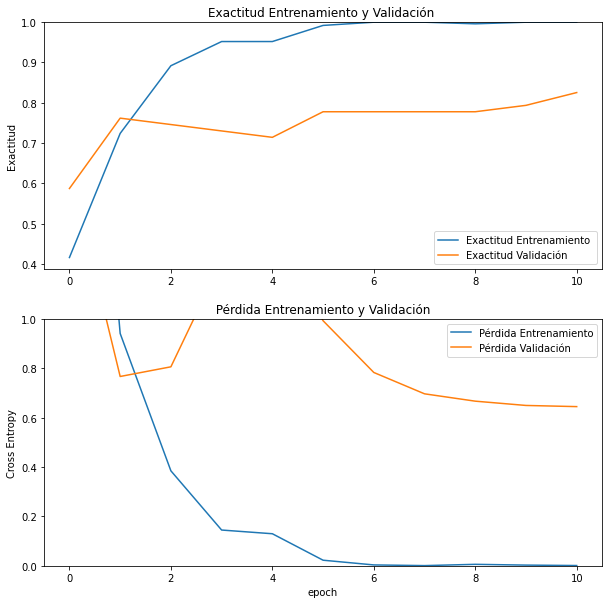

In [ ]:
acc = grado_train_dropout.history['accuracy']
val_acc = grado_train_dropout.history['val_accuracy']

loss = grado_train_dropout.history['loss']
val_loss = grado_train_dropout.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Exactitud Entrenamiento ')
plt.plot(val_acc, label='Exactitud Validación')
plt.legend(loc='lower right')
plt.ylabel('Exactitud')
plt.ylim([min(plt.ylim()),1])
plt.title('Exactitud Entrenamiento y Validación ')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title(' Pérdida Entrenamiento y Validación ')
plt.xlabel('epoch')
plt.show()

In [ ]:
test_eval = model_out.evaluate(x_test, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

3/3 [==============================] - 1s 174ms/step - loss: 0.8526 - accuracy: 0.8101
Test loss: 0.8526157140731812
Test accuracy: 0.8101266026496887


In [ ]:
predicted_classes = model_out.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape

((79,), (79,))

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.56      0.82      0.67        11
     Class 1       0.79      0.66      0.72        29
     Class 2       0.80      0.80      0.80        10
     Class 3       0.95      0.95      0.95        19
     Class 4       1.00      1.00      1.00        10

    accuracy                           0.81        79
   macro avg       0.82      0.84      0.83        79
weighted avg       0.82      0.81      0.81        79



In [ ]:
from sklearn.metrics import confusion_matrix

matriz=confusion_matrix(y_test, predicted_classes)
print(matriz)

[[ 9  2  0  0  0]
 [ 7 19  2  1  0]
 [ 0  2  8  0  0]
 [ 0  1  0 18  0]
 [ 0  0  0  0 10]]


Accuracy:64.00%


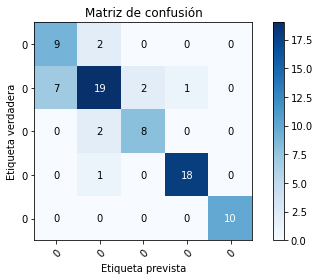

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
#from sklearn.svm import SVC


import json
from skimage import color
from skimage.feature import hog
#from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, recall_score
from subprocess import check_output

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión'
        else:
            title = 'Matriz de confusión, sin normalización'

    # Compute confusion matrix

    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta prevista')

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

precision=metrics.accuracy_score(y_test,predicted_classes, normalize=False)

print("Accuracy:{0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=False,title="Matriz de confusión")
plt.show()

Accuracy:81.01%


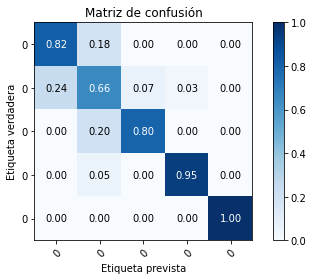

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
#from sklearn.svm import SVC


import json
from skimage import color
from skimage.feature import hog
#from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, recall_score
from subprocess import check_output

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión'
        else:
            title = 'Matriz de confusión, sin normalización'

    # Compute confusion matrix

    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta prevista')

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

precision=metrics.accuracy_score(y_test,predicted_classes, normalize=True)*100

print("Accuracy:{0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=True,title="Matriz de confusión")
plt.show()

In [ ]:
model_out.save("/content/drive/My Drive/source_dir/gradoma_final_064.h5py")

INFO:tensorflow:Assets written to: /content/drive/My Drive/source_dir/gradoma_final_064.h5py/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


NUEVA PRUEBA VGG16

In [ ]:
#preprocess_input = tf.keras.applications.VGG16.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
IMG_SIZE = (100, 100)
img_height=100
img_width=100

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.trainable = False

base_model.summary()
for layer in base_model.layers:
           if layer.name == 'block5_conv1':
              break
           layer.trainable = False


# We add our classificator (top_model) to the last layer of the model
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(5, activation='softmax', name='predictions')(x)
model_out_vgg16 = Model(base_model.input, x)
#We compile the model
model_out_vgg16.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])
model_out_vgg16.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3)

grado_train_dropout = model_out_vgg16.fit(train_x, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),callbacks=[callback])

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

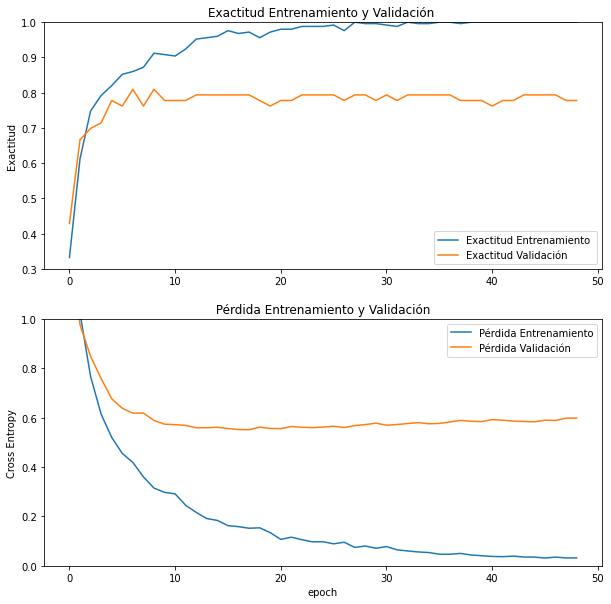

In [ ]:
acc = grado_train_dropout.history['accuracy']
val_acc = grado_train_dropout.history['val_accuracy']

loss = grado_train_dropout.history['loss']
val_loss = grado_train_dropout.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Exactitud Entrenamiento ')
plt.plot(val_acc, label='Exactitud Validación')
plt.legend(loc='lower right')
plt.ylabel('Exactitud')
plt.ylim([min(plt.ylim()),1])
plt.title('Exactitud Entrenamiento y Validación ')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title(' Pérdida Entrenamiento y Validación ')
plt.xlabel('epoch')
plt.show()

In [ ]:
test_eval = model_out_vgg16.evaluate(x_test, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

3/3 [==============================] - 7s 2s/step - loss: 0.4321 - accuracy: 0.8354
Test loss: 0.43213382363319397
Test accuracy: 0.8354430198669434


In [ ]:
predicted_classes = model_out_vgg16.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape

((79,), (79,))

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.55      0.55      0.55        11
     Class 1       0.75      0.83      0.79        29
     Class 2       1.00      0.60      0.75        10
     Class 3       0.95      1.00      0.97        19
     Class 4       1.00      1.00      1.00        10

    accuracy                           0.82        79
   macro avg       0.85      0.79      0.81        79
weighted avg       0.83      0.82      0.82        79



In [ ]:
from sklearn.metrics import confusion_matrix

matriz=confusion_matrix(y_test, predicted_classes)
print(matriz)

[[ 6  5  0  0  0]
 [ 5 24  0  0  0]
 [ 0  3  6  1  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 10]]


Accuracy:65.00%


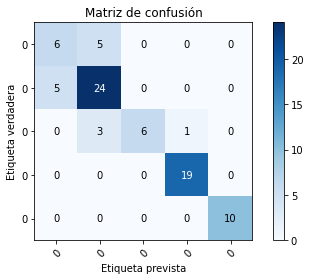

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
#from sklearn.svm import SVC


import json
from skimage import color
from skimage.feature import hog
#from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, recall_score
from subprocess import check_output

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión'
        else:
            title = 'Matriz de confusión, sin normalización'

    # Compute confusion matrix

    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta prevista')

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

precision=metrics.accuracy_score(y_test,predicted_classes, normalize=False)

print("Accuracy:{0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=False,title="Matriz de confusión")
plt.show()

Accuracy:82.28%


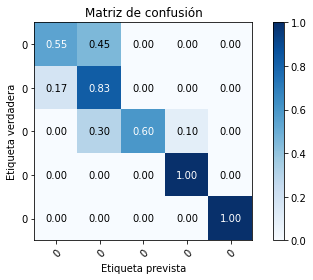

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics

import json
from skimage import color
from skimage.feature import hog
from sklearn.metrics import classification_report,accuracy_score, recall_score
from subprocess import check_output

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión'
        else:
            title = 'Matriz de confusión, sin normalización'

    # Compute confusion matrix

    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta prevista')

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

precision=metrics.accuracy_score(y_test,predicted_classes, normalize=True)*100

print("Accuracy:{0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=True,title="Matriz de confusión")
plt.show()

In [ ]:
model_out_vgg16.save("/content/drive/My Drive/source_dir/gradoma_final_vgg16.h5py")

INFO:tensorflow:Assets written to: /content/drive/My Drive/source_dir/gradoma_final_vgg16.h5py/assets


New EfficientNetB0

In [ ]:
#preprocess_input = tf.keras.applications.EfficientNetB0.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
IMG_SIZE = (100, 100)
img_height=100
img_width=100

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.EfficientNetB0(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model.trainable = False

base_model.summary()
for layer in base_model.layers:
           if layer.name == 'block5_conv1':
              break
           layer.trainable = False


# We add our classificator (top_model) to the last layer of the model
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(5, activation='softmax', name='predictions')(x)
model_out_efb0 = Model(base_model.input, x)
#We compile the model
model_out_efb0.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])
model_out_efb0.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3)

grado_train_dropout = model_out_efb0.fit(train_x, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),callbacks=[callback])

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_7 (Rescaling)        (None, 100, 100, 3)  0           ['input_6[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 100, 100, 3)  7          ['rescaling_7[0][0]']            
 )                                                                                                
                                                                                     

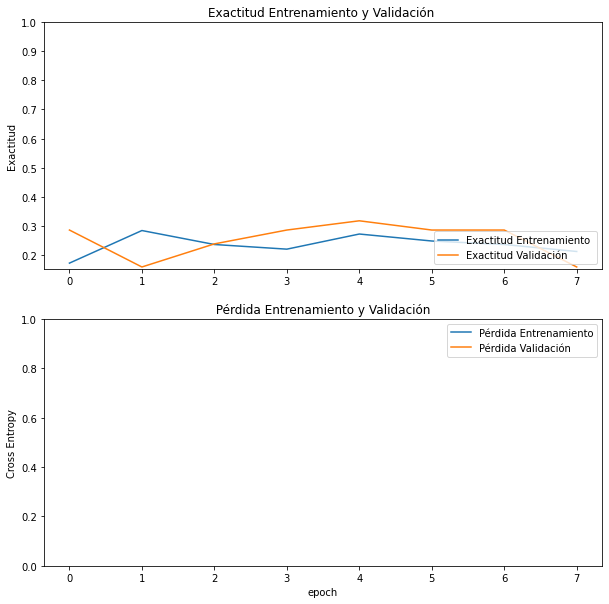

In [ ]:
acc = grado_train_dropout.history['accuracy']
val_acc = grado_train_dropout.history['val_accuracy']

loss = grado_train_dropout.history['loss']
val_loss = grado_train_dropout.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Exactitud Entrenamiento ')
plt.plot(val_acc, label='Exactitud Validación')
plt.legend(loc='lower right')
plt.ylabel('Exactitud')
plt.ylim([min(plt.ylim()),1])
plt.title('Exactitud Entrenamiento y Validación ')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title(' Pérdida Entrenamiento y Validación ')
plt.xlabel('epoch')
plt.show()

In [ ]:
predicted_classes = model_out_efb0.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape

((79,), (79,))

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.14      1.00      0.24        11
     Class 1       0.00      0.00      0.00        29
     Class 2       0.00      0.00      0.00        10
     Class 3       0.00      0.00      0.00        19
     Class 4       0.00      0.00      0.00        10

    accuracy                           0.14        79
   macro avg       0.03      0.20      0.05        79
weighted avg       0.02      0.14      0.03        79



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

matriz=confusion_matrix(y_test, predicted_classes)
print(matriz)

[[11  0  0  0  0]
 [29  0  0  0  0]
 [10  0  0  0  0]
 [19  0  0  0  0]
 [10  0  0  0  0]]


Accuracy:11.00%


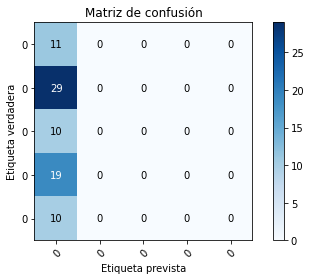

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
#from sklearn.svm import SVC


import json
from skimage import color
from skimage.feature import hog
#from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, recall_score
from subprocess import check_output

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión'
        else:
            title = 'Matriz de confusión, sin normalización'

    # Compute confusion matrix

    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta prevista')

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

precision=metrics.accuracy_score(y_test,predicted_classes, normalize=False)

print("Accuracy:{0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=False,title="Matriz de confusión")
plt.show()

Accuracy:13.92%


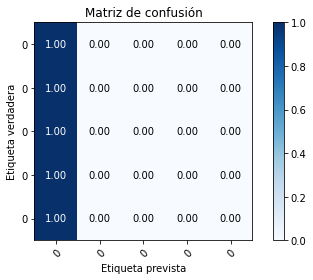

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
#from sklearn.svm import SVC


import json
from skimage import color
from skimage.feature import hog
#from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, recall_score
from subprocess import check_output

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión'
        else:
            title = 'Matriz de confusión, sin normalización'

    # Compute confusion matrix

    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta prevista')

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

precision=metrics.accuracy_score(y_test,predicted_classes, normalize=True)*100

print("Accuracy:{0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=True,title="Matriz de confusión")
plt.show()

In [ ]:
model_out_vgg16.save("/content/drive/My Drive/source_dir/gradoma_final_effb0.h5py")

INFO:tensorflow:Assets written to: /content/drive/My Drive/source_dir/gradoma_final_effb0.h5py/assets


**NUEVA PRUEBA DenseNet121**



In [ ]:
#preprocess_input = tf.keras.applications.DenseNet121.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
IMG_SIZE = (100, 100)
img_height=100
img_width=100

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.DenseNet121(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

base_model.summary()
for layer in base_model.layers:
           if layer.name == 'block5_conv1':
              break
           layer.trainable = False

# We add our classificator (top_model) to the last layer of the model
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(5, activation='softmax', name='predictions')(x)
model_out_desnet121 = Model(base_model.input, x)
#We compile the model

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_7 (Rescaling)        (None, 100, 100, 3)  0           ['input_6[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 100, 100, 3)  7          ['rescaling_7[0][0]']            
 )                                                                                                
                                                                                     

In [ ]:
model_out_desnet121.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])
model_out_desnet121.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3)

grado_train_dropout = model_out_desnet121.fit(train_x, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),callbacks=[callback])

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_7 (Rescaling)        (None, 100, 100, 3)  0           ['input_6[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 100, 100, 3)  7          ['rescaling_7[0][0]']            
 )                                                                                                
                                                                                            

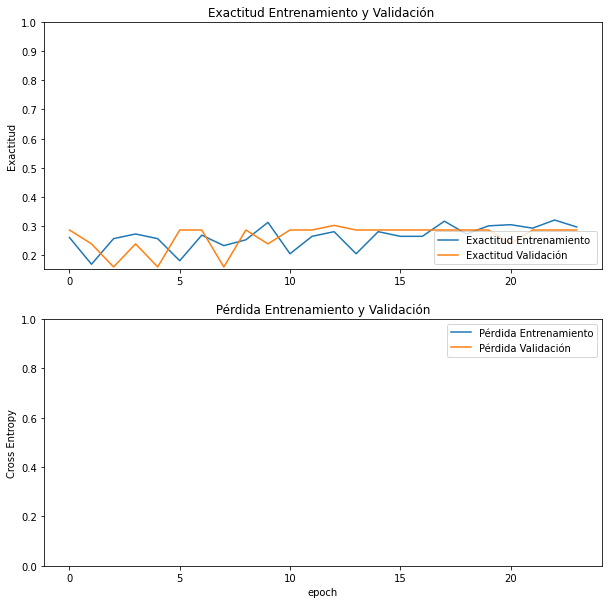

In [ ]:
acc = grado_train_dropout.history['accuracy']
val_acc = grado_train_dropout.history['val_accuracy']

loss = grado_train_dropout.history['loss']
val_loss = grado_train_dropout.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Exactitud Entrenamiento ')
plt.plot(val_acc, label='Exactitud Validación')
plt.legend(loc='lower right')
plt.ylabel('Exactitud')
plt.ylim([min(plt.ylim()),1])
plt.title('Exactitud Entrenamiento y Validación ')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title(' Pérdida Entrenamiento y Validación ')
plt.xlabel('epoch')
plt.show()

In [ ]:
predicted_classes = model_out_desnet121.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape

((79,), (79,))

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.14      1.00      0.24        11
     Class 1       0.00      0.00      0.00        29
     Class 2       0.00      0.00      0.00        10
     Class 3       0.00      0.00      0.00        19
     Class 4       0.00      0.00      0.00        10

    accuracy                           0.14        79
   macro avg       0.03      0.20      0.05        79
weighted avg       0.02      0.14      0.03        79



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:11.00%


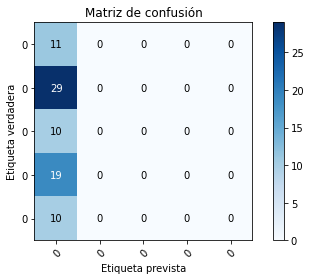

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
#from sklearn.svm import SVC


import json
from skimage import color
from skimage.feature import hog
#from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, recall_score
from subprocess import check_output

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión'
        else:
            title = 'Matriz de confusión, sin normalización'

    # Compute confusion matrix

    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta prevista')

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

precision=metrics.accuracy_score(y_test,predicted_classes, normalize=False)

print("Accuracy:{0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=False,title="Matriz de confusión")
plt.show()

Accuracy:13.92%


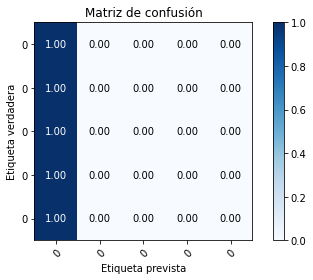

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
#from sklearn.svm import SVC


import json
from skimage import color
from skimage.feature import hog
#from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, recall_score
from subprocess import check_output

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión'
        else:
            title = 'Matriz de confusión, sin normalización'

    # Compute confusion matrix

    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta prevista')

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

precision=metrics.accuracy_score(y_test,predicted_classes, normalize=True)*100

print("Accuracy:{0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=True,title="Matriz de confusión")
plt.show()

In [ ]:
model_out_desnet121.save("/content/drive/My Drive/source_dir/gradoma_final_desnet121.h5py")

INFO:tensorflow:Assets written to: /content/drive/My Drive/source_dir/gradoma_final_desnet121.h5py/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


***NUEVA PRUEBA InceptionResNetV2***

In [ ]:
#preprocess_input = tf.keras.applications.InceptionResNetV2.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
IMG_SIZE = (100, 100)
img_height=100
img_width=100

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.InceptionResNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

219070464/219055592 [==============================] - 3s 0us/step


In [ ]:
base_model.trainable = False

base_model.summary()
for layer in base_model.layers:
           if layer.name == 'block5_conv1':
              break
           layer.trainable = False
# We add our classificator (top_model) to the last layer of the model
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(5, activation='softmax', name='predictions')(x)
model_out_inceResv2 = Model(base_model.input, x)
#We compile the model

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 49, 49, 32)   864         ['input_7[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 49, 49, 32)  96          ['conv2d_3[0][0]']               
 alization)                                                                                       
                                                                                

In [ ]:
model_out_inceResv2.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])
model_out_inceResv2.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3)

grado_train_dropout = model_out_inceResv2.fit(train_x, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),callbacks=[callback])

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 49, 49, 32)   864         ['input_7[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 49, 49, 32)  96          ['conv2d_3[0][0]']               
 alization)                                                                                       
                                                                                            

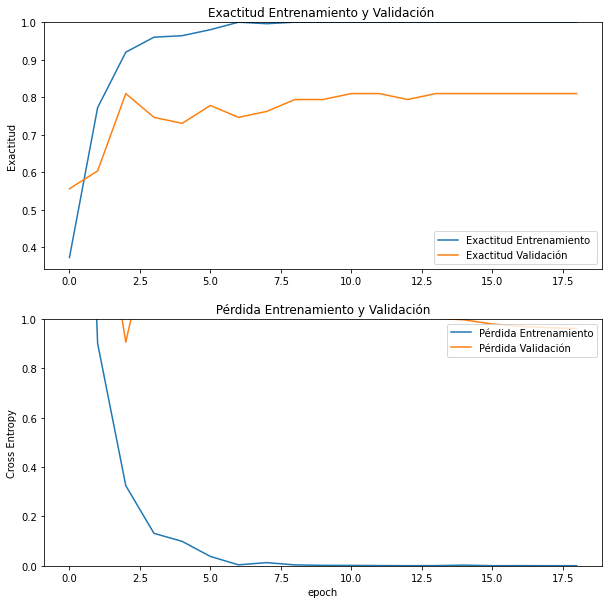

In [ ]:
acc = grado_train_dropout.history['accuracy']
val_acc = grado_train_dropout.history['val_accuracy']

loss = grado_train_dropout.history['loss']
val_loss = grado_train_dropout.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Exactitud Entrenamiento ')
plt.plot(val_acc, label='Exactitud Validación')
plt.legend(loc='lower right')
plt.ylabel('Exactitud')
plt.ylim([min(plt.ylim()),1])
plt.title('Exactitud Entrenamiento y Validación ')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title(' Pérdida Entrenamiento y Validación ')
plt.xlabel('epoch')
plt.show()

In [ ]:
test_eval = model_out_inceResv2.evaluate(x_test, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

3/3 [==============================] - 2s 642ms/step - loss: 0.7913 - accuracy: 0.7468
Test loss: 0.7912967801094055
Test accuracy: 0.746835470199585


In [ ]:
predicted_classes = model_out_inceResv2.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape

((79,), (79,))

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.46      0.55      0.50        11
     Class 1       0.72      0.79      0.75        29
     Class 2       0.60      0.30      0.40        10
     Class 3       0.94      0.79      0.86        19
     Class 4       0.69      0.90      0.78        10

    accuracy                           0.71        79
   macro avg       0.68      0.67      0.66        79
weighted avg       0.72      0.71      0.70        79



In [ ]:
from sklearn.metrics import confusion_matrix

matriz=confusion_matrix(y_test, predicted_classes)
print(matriz)

[[ 6  5  0  0  0]
 [ 3 23  1  1  1]
 [ 2  4  3  0  1]
 [ 1  0  1 15  2]
 [ 1  0  0  0  9]]


Accuracy:56.00


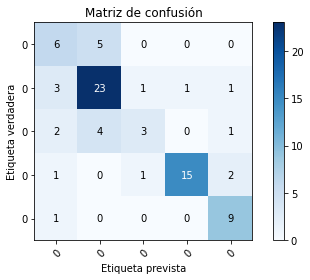

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
#from sklearn.svm import SVC


import json
from skimage import color
from skimage.feature import hog
#from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, recall_score
from subprocess import check_output

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión'
        else:
            title = 'Matriz de confusión, sin normalización'

    # Compute confusion matrix

    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta prevista')

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

precision=metrics.accuracy_score(y_test,predicted_classes, normalize=False)

print("Accuracy:{0:.2f}".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=False,title="Matriz de confusión")
plt.show()

Accuracy:0.71%


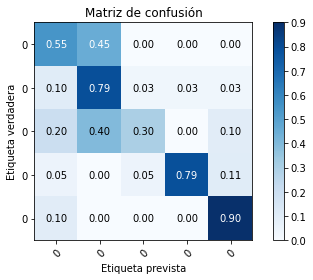

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
#from sklearn.svm import SVC


import json
from skimage import color
from skimage.feature import hog
#from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, recall_score
from subprocess import check_output

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión'
        else:
            title = 'Matriz de confusión, sin normalización'

    # Compute confusion matrix

    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta prevista')

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

precision=metrics.accuracy_score(y_test,predicted_classes, normalize=True)

print("Accuracy:{0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=True,title="Matriz de confusión")
plt.show()

In [ ]:
model_out_inceResv2.save("/content/drive/My Drive/source_dir/gradoma_final_inceResv2.h5py")

INFO:tensorflow:Assets written to: /content/drive/My Drive/source_dir/gradoma_final_inceResv2.h5py/assets


***PRUEBA DenseNet201***

In [ ]:
#preprocess_input = tf.keras.applications.InceptionResNetV2.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
IMG_SIZE = (100, 100)
img_height=100
img_width=100

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

74850304/74836368 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable = False

base_model.summary()
for layer in base_model.layers:
           if layer.name == 'block5_conv1':
              break
           layer.trainable = False
# We add our classificator (top_model) to the last layer of the model
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(5, activation='softmax', name='predictions')(x)
model_out_desnet201 = Model(base_model.input, x)
#We compile the model
model_out_desnet201.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])
model_out_desnet201.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3)

grado_train_dropout = model_out_desnet201.fit(train_x, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),callbacks=[callback])

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 106, 106, 3)  0          ['input_8[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d_2[0][0]']       
                                                                                        

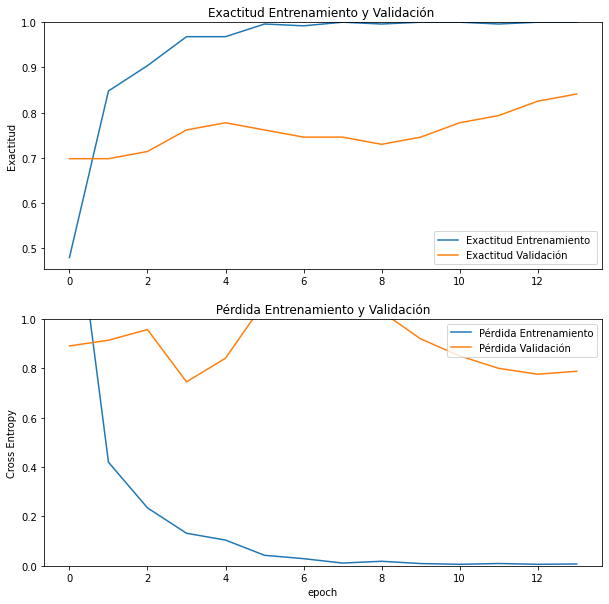

In [ ]:
acc = grado_train_dropout.history['accuracy']
val_acc = grado_train_dropout.history['val_accuracy']

loss = grado_train_dropout.history['loss']
val_loss = grado_train_dropout.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Exactitud Entrenamiento ')
plt.plot(val_acc, label='Exactitud Validación')
plt.legend(loc='lower right')
plt.ylabel('Exactitud')
plt.ylim([min(plt.ylim()),1])
plt.title('Exactitud Entrenamiento y Validación ')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title(' Pérdida Entrenamiento y Validación ')
plt.xlabel('epoch')
plt.show()




In [ ]:
test_eval = model_out_desnet201.evaluate(x_test, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

3/3 [==============================] - 3s 880ms/step - loss: 0.8235 - accuracy: 0.8354
Test loss: 0.8235287070274353
Test accuracy: 0.8354430198669434


In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.46      0.55      0.50        11
     Class 1       0.72      0.79      0.75        29
     Class 2       0.60      0.30      0.40        10
     Class 3       0.94      0.79      0.86        19
     Class 4       0.69      0.90      0.78        10

    accuracy                           0.71        79
   macro avg       0.68      0.67      0.66        79
weighted avg       0.72      0.71      0.70        79



In [ ]:
from sklearn.metrics import confusion_matrix

matriz=confusion_matrix(y_test, predicted_classes)
print(matriz)

[[ 6  5  0  0  0]
 [ 3 23  1  1  1]
 [ 2  4  3  0  1]
 [ 1  0  1 15  2]
 [ 1  0  0  0  9]]


Accuracy:56.00


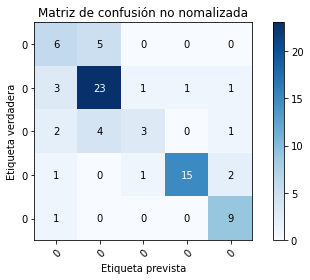

Accuracy:70.89%


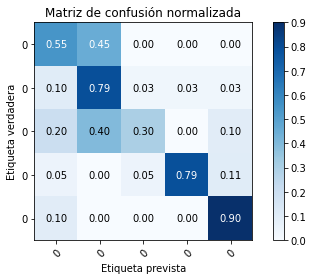

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
#from sklearn.svm import SVC


import json
from skimage import color
from skimage.feature import hog
#from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, recall_score
from subprocess import check_output

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión'
        else:
            title = 'Matriz de confusión, sin normalización'

    # Compute confusion matrix

    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta prevista')

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

precision=metrics.accuracy_score(y_test,predicted_classes, normalize=False)

print("Accuracy:{0:.2f}".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=False,title="Matriz de confusión no nomalizada")
plt.show()


precision=metrics.accuracy_score(y_test,predicted_classes, normalize=True)*100

print("Accuracy:{0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=True,title="Matriz de confusión normalizada")
plt.show()

PRUEBA XCEPTION

In [ ]:
#preprocess_input = tf.keras.applications.Xception.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
IMG_SIZE = (100, 100)
img_height=100
img_width=100

IMG_SHAPE = IMG_SIZE + (3,)
base_model_Xception = tf.keras.applications.Xception(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
base_model_Xception.trainable = False

base_model_Xception.summary()
for layer in base_model_Xception.layers:
           if layer.name == 'block5_conv1':
              break
           layer.trainable = False
# We add our classificator (top_model) to the last layer of the model
last = base_model_Xception.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(5, activation='softmax', name='predictions')(x)
model_out_Xception = Model(base_model_Xception.input, x)
#We compile the model
#We compile the model
model_out_Xception.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])
model_out_Xception.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3)

grado_train_dropout = model_out_Xception.fit(train_x, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),callbacks=[callback])

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 49, 49, 32)   864         ['input_9[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 49, 49, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                           

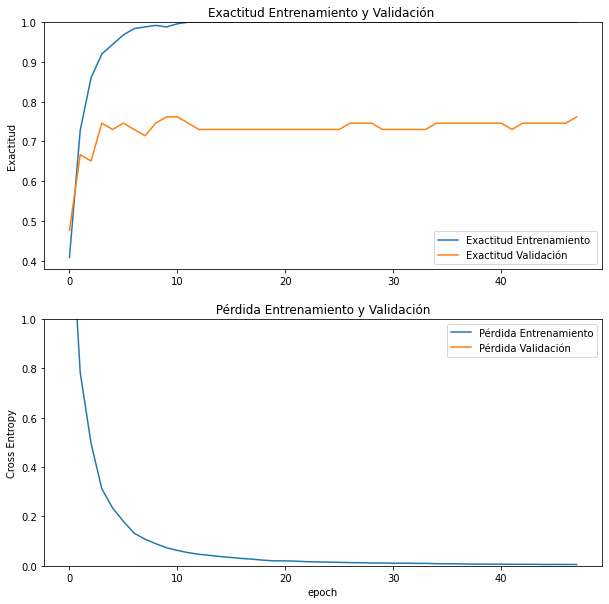

In [ ]:
acc = grado_train_dropout.history['accuracy']
val_acc = grado_train_dropout.history['val_accuracy']

loss = grado_train_dropout.history['loss']
val_loss = grado_train_dropout.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Exactitud Entrenamiento ')
plt.plot(val_acc, label='Exactitud Validación')
plt.legend(loc='lower right')
plt.ylabel('Exactitud')
plt.ylim([min(plt.ylim()),1])
plt.title('Exactitud Entrenamiento y Validación ')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title(' Pérdida Entrenamiento y Validación ')
plt.xlabel('epoch')
plt.show()

In [ ]:
test_eval = model_out_Xception.evaluate(x_test, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

predicted_classes = model_out_Xception.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape

3/3 [==============================] - 2s 734ms/step - loss: 1.1522 - accuracy: 0.6835
Test loss: 1.1522263288497925
Test accuracy: 0.6835442781448364


((79,), (79,))

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.36      0.36      0.36        11
     Class 1       0.62      0.69      0.66        29
     Class 2       0.43      0.30      0.35        10
     Class 3       0.89      0.89      0.89        19
     Class 4       1.00      1.00      1.00        10

    accuracy                           0.68        79
   macro avg       0.66      0.65      0.65        79
weighted avg       0.68      0.68      0.68        79



In [ ]:
from sklearn.metrics import confusion_matrix

matriz=confusion_matrix(y_test, predicted_classes)
print(matriz)

[[ 4  6  1  0  0]
 [ 7 20  2  0  0]
 [ 0  5  3  2  0]
 [ 0  1  1 17  0]
 [ 0  0  0  0 10]]


Accuracy:54.00


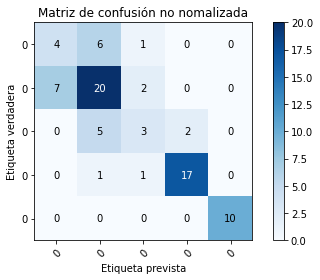

Accuracy:68.35%


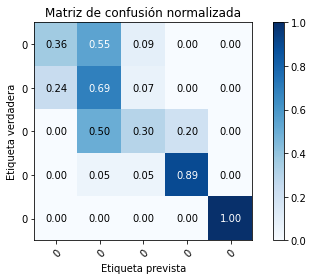

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
#from sklearn.svm import SVC


import json
from skimage import color
from skimage.feature import hog
#from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, recall_score
from subprocess import check_output

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión'
        else:
            title = 'Matriz de confusión, sin normalización'

    # Compute confusion matrix

    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta prevista')

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

precision=metrics.accuracy_score(y_test,predicted_classes, normalize=False)

print("Accuracy:{0:.2f}".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=False,title="Matriz de confusión no nomalizada")
plt.show()


precision=metrics.accuracy_score(y_test,predicted_classes, normalize=True)*100

print("Accuracy:{0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=True,title="Matriz de confusión normalizada")
plt.show()

In [ ]:
model_out_Xception.save("/content/drive/My Drive/source_dir/gradoma_final_xception.h5py")

INFO:tensorflow:Assets written to: /content/drive/My Drive/source_dir/gradoma_final_xception.h5py/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


MODELO RESNET50

In [ ]:
#preprocess_input = tf.keras.applications.ResNet50.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
IMG_SIZE = (100, 100)
img_height=100
img_width=100

IMG_SHAPE = IMG_SIZE + (3,)
base_model_resnet50 = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
base_model_resnet50.trainable = False

base_model_resnet50.summary()
for layer in base_model_resnet50.layers:
           if layer.name == 'block5_conv1':
              break
           layer.trainable = False
# We add our classificator (top_model) to the last layer of the model
last = base_model_resnet50.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(5, activation='softmax', name='predictions')(x)
model_out_resnet50 = Model(base_model_resnet50.input, x)
#We compile the model
#We compile the model
model_out_resnet50.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])
model_out_resnet50.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3)

grado_train_dropout = model_out_resnet50.fit(train_x, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),callbacks=[callback])

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_12[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']      

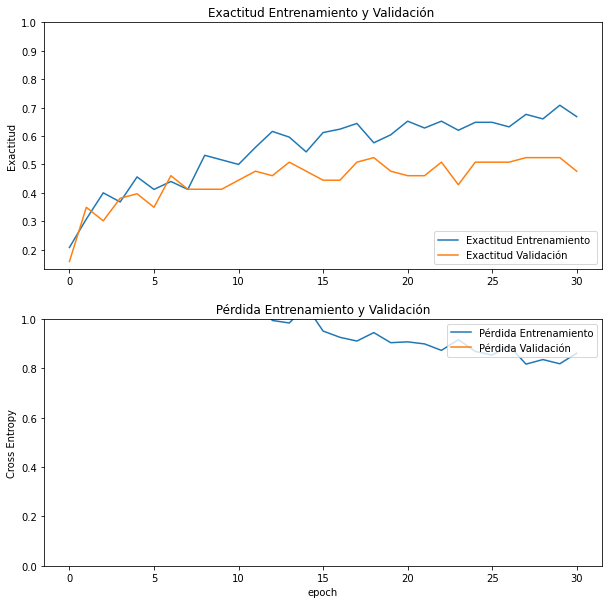

In [ ]:
acc = grado_train_dropout.history['accuracy']
val_acc = grado_train_dropout.history['val_accuracy']

loss = grado_train_dropout.history['loss']
val_loss = grado_train_dropout.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Exactitud Entrenamiento ')
plt.plot(val_acc, label='Exactitud Validación')
plt.legend(loc='lower right')
plt.ylabel('Exactitud')
plt.ylim([min(plt.ylim()),1])
plt.title('Exactitud Entrenamiento y Validación ')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title(' Pérdida Entrenamiento y Validación ')
plt.xlabel('epoch')
plt.show()

In [ ]:
test_eval = model_out_resnet50.evaluate(x_test, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

predicted_classes = model_out_resnet50.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape

3/3 [==============================] - 3s 844ms/step - loss: 1.0105 - accuracy: 0.6076
Test loss: 1.0105129480361938
Test accuracy: 0.607594907283783


((79,), (79,))

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.20      0.91      0.32        11
     Class 1       0.56      0.17      0.26        29
     Class 2       0.00      0.00      0.00        10
     Class 3       0.82      0.47      0.60        19
     Class 4       0.88      0.70      0.78        10

    accuracy                           0.39        79
   macro avg       0.49      0.45      0.39        79
weighted avg       0.54      0.39      0.38        79



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

matriz=confusion_matrix(y_test, predicted_classes)
print(matriz)

[[10  1  0  0  0]
 [22  5  0  2  0]
 [ 7  2  0  0  1]
 [ 9  1  0  9  0]
 [ 3  0  0  0  7]]


Accuracy:31.00


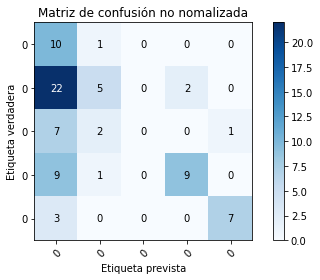

Accuracy:39.24%


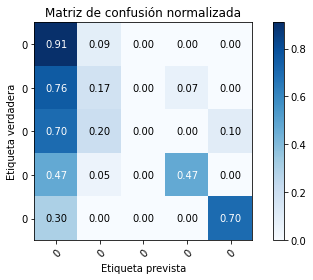

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
#from sklearn.svm import SVC


import json
from skimage import color
from skimage.feature import hog
#from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, recall_score
from subprocess import check_output

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión'
        else:
            title = 'Matriz de confusión, sin normalización'

    # Compute confusion matrix

    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta prevista')

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

precision=metrics.accuracy_score(y_test,predicted_classes, normalize=False)

print("Accuracy:{0:.2f}".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=False,title="Matriz de confusión no nomalizada")
plt.show()


precision=metrics.accuracy_score(y_test,predicted_classes, normalize=True)*100

print("Accuracy:{0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=True,title="Matriz de confusión normalizada")
plt.show()

In [ ]:
model_out_resnet50.save("/content/drive/My Drive/source_dir/gradoma_final_resnet50.h5py")

INFO:tensorflow:Assets written to: /content/drive/My Drive/source_dir/gradoma_final_resnet50.h5py/assets


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.7/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


VGG19

In [ ]:
#preprocess_input = tf.keras.applications.VGG19.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
IMG_SIZE = (100, 100)
img_height=100
img_width=100

IMG_SHAPE = IMG_SIZE + (3,)
base_model_vgg19 = tf.keras.applications.VGG19(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
base_model_vgg19.trainable = False

base_model_vgg19.summary()
for layer in base_model_vgg19.layers:
           if layer.name == 'block5_conv1':
              break
           layer.trainable = False
# We add our classificator (top_model) to the last layer of the model
last = base_model_vgg19.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(5, activation='softmax', name='predictions')(x)
model_out_vgg19 = Model(base_model_vgg19.input, x)
#We compile the model
#We compile the model
model_out_vgg19.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])
model_out_vgg19.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3)

grado_train_dropout = model_out_vgg19.fit(train_x, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),callbacks=[callback])

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

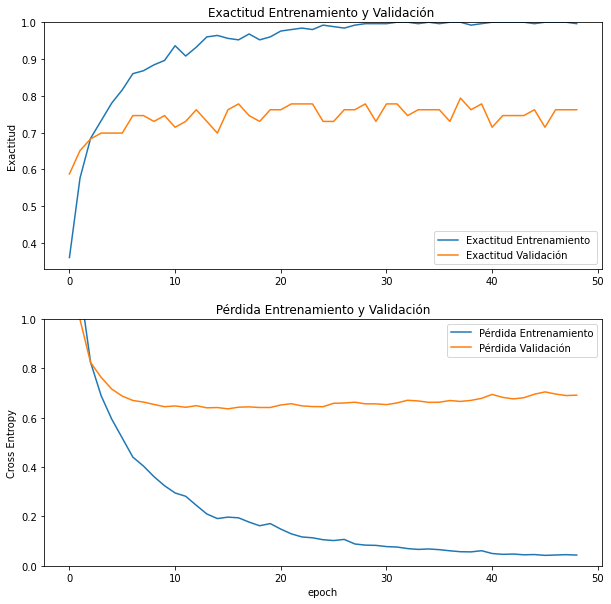

In [ ]:
acc = grado_train_dropout.history['accuracy']
val_acc = grado_train_dropout.history['val_accuracy']

loss = grado_train_dropout.history['loss']
val_loss = grado_train_dropout.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Exactitud Entrenamiento ')
plt.plot(val_acc, label='Exactitud Validación')
plt.legend(loc='lower right')
plt.ylabel('Exactitud')
plt.ylim([min(plt.ylim()),1])
plt.title('Exactitud Entrenamiento y Validación ')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title(' Pérdida Entrenamiento y Validación ')
plt.xlabel('epoch')
plt.show()

In [ ]:
test_eval = model_out_vgg19.evaluate(x_test, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

predicted_classes = model_out_vgg19.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, y_test.shape

3/3 [==============================] - 9s 3s/step - loss: 0.5306 - accuracy: 0.7975
Test loss: 0.5306042432785034
Test accuracy: 0.797468364238739


((79,), (79,))

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.54      0.64      0.58        11
     Class 1       0.76      0.76      0.76        29
     Class 2       0.71      0.50      0.59        10
     Class 3       0.95      1.00      0.97        19
     Class 4       1.00      1.00      1.00        10

    accuracy                           0.80        79
   macro avg       0.79      0.78      0.78        79
weighted avg       0.80      0.80      0.80        79



In [ ]:
from sklearn.metrics import confusion_matrix

matriz=confusion_matrix(y_test, predicted_classes)
print(matriz)

[[ 7  4  0  0  0]
 [ 5 22  2  0  0]
 [ 1  3  5  1  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 10]]


Accuracy:63.00


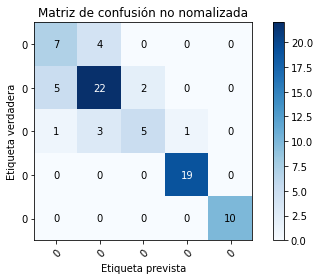

Accuracy:79.75%


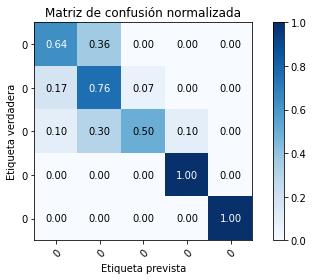

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
#from sklearn.svm import SVC


import json
from skimage import color
from skimage.feature import hog
#from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, recall_score
from subprocess import check_output

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión'
        else:
            title = 'Matriz de confusión, sin normalización'

    # Compute confusion matrix

    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta prevista')

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

precision=metrics.accuracy_score(y_test,predicted_classes, normalize=False)

print("Muestra:{0:.2f}".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=False,title="Matriz de confusión no nomalizada")
plt.show()


precision=metrics.accuracy_score(y_test,predicted_classes, normalize=True)*100

print("Accuracy:{0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=True,title="Matriz de confusión normalizada")
plt.show()

In [ ]:
model_out_vgg19.save("/content/drive/My Drive/source_dir/gradoma_final_vgg19.h5py")

INCEPTION V3

In [ ]:
#preprocess_input = tf.keras.applications.InceptionV3.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)
IMG_SIZE = (100, 100)
img_height=100
img_width=100

IMG_SHAPE = IMG_SIZE + (3,)
base_model_incepV3 = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
base_model_incepV3.trainable = False

base_model_incepV3.summary()
for layer in base_model_incepV3.layers:
           if layer.name == 'block5_conv1':
              break
           layer.trainable = False
# We add our classificator (top_model) to the last layer of the model
last = base_model_incepV3.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(5, activation='softmax', name='predictions')(x)
model_out_incepv3 = Model(base_model_incepV3.input, x)
#We compile the model

model_out_incepv3.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])
model_out_incepv3.summary()
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3)

grado_train_dropout = model_out_incepv3.fit(train_x, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label),callbacks=[callback])

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_210 (Conv2D)            (None, 49, 49, 32)   864         ['input_14[0][0]']               
                                                                                                  
 batch_normalization_207 (Batch  (None, 49, 49, 32)  96          ['conv2d_210[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [ ]:
test_eval = model_out_incepv3.evaluate(x_test, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

predicted_classes1 = model_out_incepv3.predict(x_test)
predicted_classes1 = np.argmax(np.round(predicted_classes1),axis=1)
predicted_classes1.shape, y_test.shape

3/3 [==============================] - 1s 303ms/step - loss: 0.9352 - accuracy: 0.7089
Test loss: 0.9352407455444336
Test accuracy: 0.7088607549667358


((79,), (79,))

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(y_test, predicted_classes1, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.27      0.36      0.31        11
     Class 1       0.65      0.69      0.67        29
     Class 2       0.75      0.30      0.43        10
     Class 3       0.94      0.84      0.89        19
     Class 4       0.75      0.90      0.82        10

    accuracy                           0.66        79
   macro avg       0.67      0.62      0.62        79
weighted avg       0.69      0.66      0.66        79



In [ ]:
from sklearn.metrics import confusion_matrix

matriz=confusion_matrix(y_test, predicted_classes)
print(matriz)

[[ 4  7  0  0  0]
 [ 7 20  1  1  0]
 [ 2  3  3  0  2]
 [ 1  1  0 16  1]
 [ 1  0  0  0  9]]


Accuracy:52.00


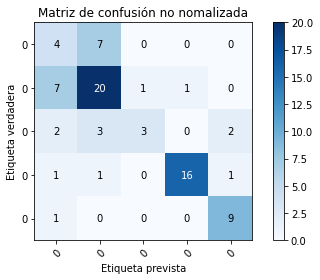

Accuracy:65.82%


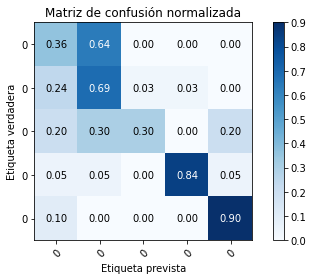

In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from mlxtend.plotting import plot_decision_regions
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
#from sklearn.svm import SVC


import json
from skimage import color
from skimage.feature import hog
#from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score, recall_score
from subprocess import check_output

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión'
        else:
            title = 'Matriz de confusión, sin normalización'

    # Compute confusion matrix

    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta prevista')

    # Rotate the tick labels and set their alignment.

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return cm,ax

precision=metrics.accuracy_score(y_test,predicted_classes, normalize=False)

print("Accuracy:{0:.2f}".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=False,title="Matriz de confusión no nomalizada")
plt.show()


precision=metrics.accuracy_score(y_test,predicted_classes, normalize=True)*100

print("Accuracy:{0:.2f}%".format(precision))
cm,_=plot_confusion_matrix(y_test,predicted_classes,classes=nClasses,normalize=True,title="Matriz de confusión normalizada")
plt.show()

In [ ]:
model_out_incepv3.save("/content/drive/My Drive/source_dir/gradoma_final_incepv3.h5py")

NameError: ignored